In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [2]:
intersections = pd.read_csv('https://data-seattlecitygis.opendata.arcgis.com/datasets/0ea49a3a3ff54ae6af2aaae47dd680fe_5.csv')
intersections.head()

,X,Y,OBJECTID,INTR_ID,GIS_XCOORD,GIS_YCOORD,COMPKEY,COMPTYPE,UNITID,SUBAREA,UNITDESC,ARTERIALCLASSCD,SIGNAL_MAINT_DIST,SIGNAL_TYPE,SHAPE_LNG,SHAPE_LAT
0,-122.329732,47.523051,1,18213,1.270709e+06,194387.95532,340313,13,78852,GRDWM,4TH AVE S AND S HENDERSON N ST,0.0,,NONE,-122.329732,47.523051
1,-122.284745,47.633387,2,10302,1.282582e+06,234414.69508,157936,13,32854,E,WOODROW PL E AND E GARFIELD ST,0.0,,NONE,-122.284745,47.633387
2,-122.371401,47.692058,3,4716,1.261648e+06,256226.49721,37264,13,231740,BLRD,12TH AVE NW AND NW 87TH ST,0.0,,NONE,-122.371401,47.692058
3,-122.289176,47.617639,4,11483,1.281381e+06,228692.21187,30231,13,42513,CNTRL,34TH AVE AND E HOWELL ST,3.0,,NONE,-122.289176,47.617639
4,-122.320648,47.674000,5,6406,1.274017e+06,249395.18840,25752,13,14252,NE,NE 63RD ST AND NE RAVENNA EB BV,1.0,,NONE,-122.320648,47.674000


In [3]:
intersections = intersections[['COMPKEY', 'SUBAREA', 'ARTERIALCLASSCD', 'SIGNAL_TYPE', 'UNITDESC']]

In [4]:
intersections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15441 entries, 0 to 15440
Data columns (total 5 columns):
COMPKEY            15441 non-null int64
SUBAREA            15441 non-null object
ARTERIALCLASSCD    15430 non-null float64
SIGNAL_TYPE        15441 non-null object
UNITDESC           15441 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 603.3+ KB


In [5]:
df = pd.read_csv('../data/all_sdot_merged_with_wsdot_080820.csv', low_memory=False)

In [6]:
df.groupby(['LOCATION','YEAR']).count().shape

(119593, 179)

In this study, we're going to focus on intersections

In [7]:
df = df[df['ADDRTYPE'] == 'Intersection']

In [8]:
df.groupby(['INTKEY','LOCATION','YEAR']).count()['STATUS']

INTKEY    LOCATION                                                 YEAR
23807.0   GOLDEN GARDENS DR NW AND SEAVIEW PL NW                   2005    1
                                                                   2009    1
                                                                   2012    1
                                                                   2013    2
                                                                   2018    1
                                                                          ..
692345.0  23RD AVE NE AND NE 133RD ST                              2019    1
701817.0  5TH AVE AND TAYLOR AVE                                   2019    1
719862.0  SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLVD OFF RP  2019    1
725404.0  AURORA AVE N AND MERCER ST                               2019    1
757580.0  MAGNOLIA WAY W AND W HOWE ST                             2019    1
Name: STATUS, Length: 38144, dtype: int64

In [9]:
df = df.set_index(['INTKEY', 'LOCATION','YEAR'])

In [10]:
count_df = pd.DataFrame(df.groupby(level=[0,1,2]).count()['STATUS'])

In [11]:
count_df = count_df.rename(columns={'STATUS' : 'COUNT'})

In [12]:
count_df.head(25)

COUNT
INTKEY  LOCATION                               YEAR       
23807.0 GOLDEN GARDENS DR NW AND SEAVIEW PL NW 2005      1
                                               2009      1
                                               2012      1
                                               2013      2
                                               2018      1
23808.0 SEAVIEW AVE NW AND SEAVIEW PL NW       2012      1
                                               2015      1
23811.0 33RD AVE NW AND NW 80TH W ST           2011      1
23814.0 34TH AVE NW AND NW 77TH ST             2020      1
23815.0 33RD AVE NW AND NW 77TH ST             2005      1
                                               2011      1
23831.0 34TH AVE NW AND NW 71ST ST             2013      1
23833.0 33RD AVE NW AND NW 70TH ST             2013      1
23843.0 34TH AVE NW AND NW 68TH ST             2006      1
                                               2009      2
23855.0 34TH AVE NW AND NW 65TH ST             2006      3
                                               2007      1
                                               2010      1
                                               2016      1
                                               2020      1
23860.0 15TH AVE NW AND NW 83RD ST             2004      4
                                               2005      2
                                               2006      3
                                               2007      6
                                               2008      8

In [13]:
count_df['COUNT'].value_counts()

1     23197
2      7346
3      3331
4      1730
5      1003
6       598
7       332
8       228
9       145
10       87
11       53
12       33
13       24
14       10
16        7
15        6
17        3
18        3
24        2
20        2
19        1
21        1
22        1
27        1
Name: COUNT, dtype: int64

Adding Features of Crash Severity

In [14]:
df.groupby(level=[0,1,2])['TOTAL FATALITIES'].sum()

INTKEY    LOCATION                                                 YEAR
23807.0   GOLDEN GARDENS DR NW AND SEAVIEW PL NW                   2005    0.0
                                                                   2009    0.0
                                                                   2012    0.0
                                                                   2013    0.0
                                                                   2018    0.0
                                                                          ... 
692345.0  23RD AVE NE AND NE 133RD ST                              2019    0.0
701817.0  5TH AVE AND TAYLOR AVE                                   2019    0.0
719862.0  SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLVD OFF RP  2019    0.0
725404.0  AURORA AVE N AND MERCER ST                               2019    0.0
757580.0  MAGNOLIA WAY W AND W HOWE ST                             2019    0.0
Name: TOTAL FATALITIES, Length: 38144, dtype: float64

Let's add this as a column to the count_df

We noticed by limiting the scope to only consider intersections, fatalities are a lot less, with 2 or more deaths from collisions completely disappearing.

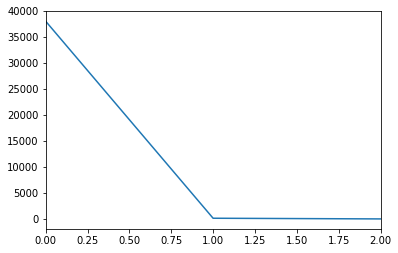

In [15]:
df.groupby(level=[0,1,2])['TOTAL FATALITIES'].sum().value_counts().plot()

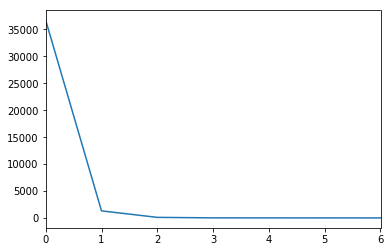

In [16]:
df.groupby(level=[0,1,2])['TOTAL SERIOUS INJURIES'].sum().value_counts().plot()

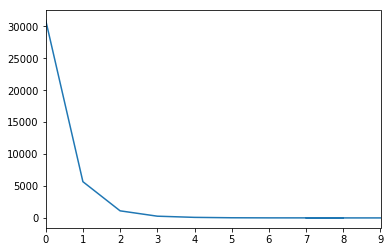

In [17]:
df.groupby(level=[0,1,2])['TOTAL EVIDENT INJURIES'].sum().value_counts().plot()

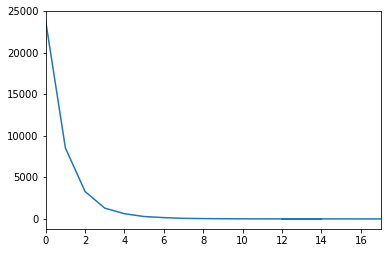

In [18]:
df.groupby(level=[0,1,2])['TOTAL POSSIBLE INJURIES'].sum().value_counts().plot()

In [19]:
count_df['TOTAL FATALITIES'] = df.groupby(level=[0,1,2])['TOTAL FATALITIES'].sum()
count_df['TOTAL SERIOUS INJURIES'] = df.groupby(level=[0,1,2])['TOTAL SERIOUS INJURIES'].sum()
count_df['TOTAL EVIDENT INJURIES'] = df.groupby(level=[0,1,2])['TOTAL EVIDENT INJURIES'].sum()
count_df['TOTAL POSSIBLE INJURIES'] = df.groupby(level=[0,1,2])['TOTAL POSSIBLE INJURIES'].sum()

In [20]:
count_df

COUNT  \
INTKEY   LOCATION                                           YEAR          
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005      1   
                                                            2009      1   
                                                            2012      1   
                                                            2013      2   
                                                            2018      1   
...                                                                 ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019      1   
701817.0 5TH AVE AND TAYLOR AVE                             2019      1   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019      1   
725404.0 AURORA AVE N AND MERCER ST                         2019      1   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019      1   

                                                                  TOTAL FATALITIES  \
INTKEY   LOCATION                                           YEAR                     
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005               0.0   
                                                            2009               0.0   
                                                            2012               0.0   
                                                            2013               0.0   
                                                            2018               0.0   
...                                                                            ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019               0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019               0.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019               0.0   
725404.0 AURORA AVE N AND MERCER ST                         2019               0.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019               0.0   

                                                                  TOTAL SERIOUS INJURIES  \
INTKEY   LOCATION                                           YEAR                           
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                     0.0   
                                                            2009                     0.0   
                                                            2012                     0.0   
                                                            2013                     1.0   
                                                            2018                     0.0   
...                                                                                  ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019                     0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019                     0.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019                     0.0   
725404.0 AURORA AVE N AND MERCER ST                         2019                     0.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019                     0.0   

                                                                  TOTAL EVIDENT INJURIES  \
INTKEY   LOCATION                                           YEAR                           
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                     0.0   
                                                            2009                     0.0   
                                                            2012                     0.0   
                                                            2013                     0.0   
                                                            2018                     1.0   
...                                                                                  ...   
692345.0 23RD AVE NE AND NE 133RD ST  

In [21]:
intersections = intersections.rename(columns={'COMPKEY':'INTKEY'}).set_index(['INTKEY'])

In [22]:
count_df.join(intersections, on=['INTKEY'])

COUNT  \
INTKEY   LOCATION                                           YEAR          
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005      1   
                                                            2009      1   
                                                            2012      1   
                                                            2013      2   
                                                            2018      1   
...                                                                 ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019      1   
701817.0 5TH AVE AND TAYLOR AVE                             2019      1   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019      1   
725404.0 AURORA AVE N AND MERCER ST                         2019      1   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019      1   

                                                                  TOTAL FATALITIES  \
INTKEY   LOCATION                                           YEAR                     
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005               0.0   
                                                            2009               0.0   
                                                            2012               0.0   
                                                            2013               0.0   
                                                            2018               0.0   
...                                                                            ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019               0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019               0.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019               0.0   
725404.0 AURORA AVE N AND MERCER ST                         2019               0.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019               0.0   

                                                                  TOTAL SERIOUS INJURIES  \
INTKEY   LOCATION                                           YEAR                           
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                     0.0   
                                                            2009                     0.0   
                                                            2012                     0.0   
                                                            2013                     1.0   
                                                            2018                     0.0   
...                                                                                  ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019                     0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019                     0.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019                     0.0   
725404.0 AURORA AVE N AND MERCER ST                         2019                     0.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019                     0.0   

                                                                  TOTAL EVIDENT INJURIES  \
INTKEY   LOCATION                                           YEAR                           
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                     0.0   
                                                            2009                     0.0   
                                                            2012                     0.0   
                                                            2013                     0.0   
                                                            2018                     1.0   
...                                                                                  ...   
692345.0 23RD AVE NE AND NE 133RD ST  

In [23]:
count_df.index

MultiIndex([( 23807.0, ...),
            ( 23807.0, ...),
            ( 23807.0, ...),
            ( 23807.0, ...),
            ( 23807.0, ...),
            ( 23808.0, ...),
            ( 23808.0, ...),
            ( 23811.0, ...),
            ( 23814.0, ...),
            ( 23815.0, ...),
            ...
            (662316.0, ...),
            (662316.0, ...),
            (673471.0, ...),
            (673474.0, ...),
            (673974.0, ...),
            (692345.0, ...),
            (701817.0, ...),
            (719862.0, ...),
            (725404.0, ...),
            (757580.0, ...)],
           names=['INTKEY', 'LOCATION', 'YEAR'], length=38144)

In [29]:
count_df.isna().values.sum()

0

In [24]:
count_df_full = count_df.join(df, on=['INTKEY','LOCATION','YEAR'], how='left', lsuffix=' ALL')

In [25]:
count_df_full

COUNT  \
INTKEY   LOCATION                                           YEAR          
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005      1   
                                                            2009      1   
                                                            2012      1   
                                                            2013      2   
                                                            2013      2   
...                                                                 ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019      1   
701817.0 5TH AVE AND TAYLOR AVE                             2019      1   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019      1   
725404.0 AURORA AVE N AND MERCER ST                         2019      1   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019      1   

                                                                  TOTAL FATALITIES ALL  \
INTKEY   LOCATION                                           YEAR                         
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                   0.0   
                                                            2009                   0.0   
                                                            2012                   0.0   
                                                            2013                   0.0   
                                                            2013                   0.0   
...                                                                                ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019                   0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019                   0.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019                   0.0   
725404.0 AURORA AVE N AND MERCER ST                         2019                   0.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019                   0.0   

                                                                  TOTAL SERIOUS INJURIES ALL  \
INTKEY   LOCATION                                           YEAR                               
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                         0.0   
                                                            2009                         0.0   
                                                            2012                         0.0   
                                                            2013                         1.0   
                                                            2013                         1.0   
...                                                                                      ...   
692345.0 23RD AVE NE AND NE 133RD ST                        2019                         0.0   
701817.0 5TH AVE AND TAYLOR AVE                             2019                         0.0   
719862.0 SR520 WB MONTLAKE BV OFF RP AND SR520 LK WA BLV... 2019                         0.0   
725404.0 AURORA AVE N AND MERCER ST                         2019                         0.0   
757580.0 MAGNOLIA WAY W AND W HOWE ST                       2019                         0.0   

                                                                  TOTAL EVIDENT INJURIES ALL  \
INTKEY   LOCATION                                           YEAR                               
23807.0  GOLDEN GARDENS DR NW AND SEAVIEW PL NW             2005                         0.0   
                                                            2009                         0.0   
                                                            2012                         0.0   
                                                            2013                         0.0   
                                                            2013                         0.0  